### Introduction to Machine Learning with Python
## Chapter 2. 지도학습
---
# 선형 서포트벡터 머신 (Linear SVM)

- SVM 은 클래스를 구분하는 분류 문제에서, 각 클래스를 잘 구분하는 선을 그어주는 방식이다.
- 아래의 그림들을 보면 SVM 이 직관적이라는 것을 알 수 있다. 두 클래스의 가운데 선을 그어주게 된다. 가장 가까이 있는 점들과의 거리가 가장 큰 직선을 찾는다.
- 이때 가장 가까이 있는 점들을 **Support Vector** 라고 하고, 찾은 직선과 서포트벡터 사이의 거리를 **최대 마진(margin)** 이라 한다.
- 결국 마진을 최대로 하는 서포트벡터와 직선을 찾는 것이 목표이다.
- SVM 에 대한 상세한 설명은 뒤에서 다루겠다.
- 참고 자료 : https://en.wikipedia.org/wiki/Support_vector_machine

<img src="ch02_07.jpg">
<p style="text-align: center;">(출처 : https://en.wikipedia.org/wiki/Support_vector_machine)</p>
<img src="ch02_08.png">
<p style="text-align: center;">(출처 : http://scikit-learn.org/stable/modules/svm.html)</p>

- 아래에서, 로지스틱 회귀와 마찬가지로 Iris 데이터에 선형 SVM 을 적용해 보겠다.
- 선형 SVM 도 평면으로 클래스를 구분하기 때문에, 로지스틱 회귀와 유사점이 많고 결과도 비슷하다.

In [71]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()

Populating the interactive namespace from numpy and matplotlib


In [83]:
from sklearn.model_selection import train_test_split

col1 = 0
col2 = 1

X = iris.data[:,[col1,col2]] # 시각화를 위해 속성 2개만 선정 (petal length & petal width)
# y = iris.target
y = iris.target.copy()
y[y==2] = 1 # 타겟값을 setosa(0), others(1) 로 설정

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

In [88]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=1)
model.fit(X_train, y_train)

score = model.score(X_train, y_train)
print(score)

0.9910714285714286


Text(0.5,1,'Linear SVC - Iris')

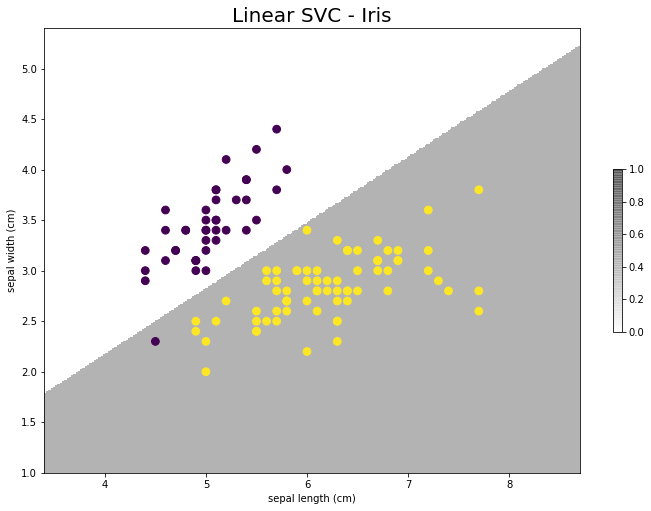

In [89]:
scale = 300
xmax = X_train[:,0].max()+1
xmin = X_train[:,0].min()-1
ymax = X_train[:,1].max()+1
ymin = X_train[:,1].min()-1

xx = np.linspace(xmin,xmax,scale)
yy = np.linspace(ymin,ymax,scale)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
pred_y = model.predict(X_grid)

fig=plt.figure(figsize=[12,10])

CS = plt.imshow(pred_y.reshape(scale,scale), interpolation=None, origin='lower',
                extent=[xmin,xmax,ymin,ymax], alpha=0.3, cmap='gray_r')

# draw X_train
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=60)

plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.colorbar(CS, shrink=0.3)
plt.title('Linear SVC - Iris',fontsize=20)

In [82]:
w = model.coef_
b = model.intercept_

display(w, b)

array([[ 0.57313948, -0.31602249]])

array([-2.77512216])

- 선형 SVM 은 평면으로 클래스를 구분하므로 로지스틱 회귀와 마찬가지로 기울기와 편향값을 제공한다.
- 하지만 확률수치를 알 수 있는 model.predict_proba() 는 제공하지 않는다.
- LinearSVC 는 C 라는 중요한 옵션을 가진다. C 값이 클수록 모델이 훈련데이터에 과대적합 되는 경향이 생긴다. 상세한 설명은 뒤에서 다루겠다.

In [76]:
help(LinearSVC)

Help on class LinearSVC in module sklearn.svm.classes:

class LinearSVC(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
 |  
 |  Linear Support Vector Classification.
 |  
 |  Similar to SVC with parameter kernel='linear', but implemented in terms of
 |  liblinear rather than libsvm, so it has more flexibility in the choice of
 |  penalties and loss functions and should scale better to large numbers of
 |  samples.
 |  
 |  This class supports both dense and sparse input and the multiclass support
 |  is handled according to a one-vs-the-rest scheme.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  penalty : string, 'l1' or 'l2' (default='l2')
 |      Specifie

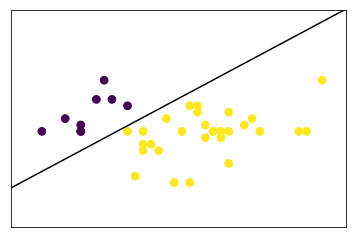

In [91]:
import mglearn

mglearn.plots.plot_2d_separator(model, X_train, eps=0.5)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=60)

In [ ]:
help(model.decision_function)

In [92]:
model.classes_

array([0, 1])

In [93]:
model.decision_function(X_test)

array([-0.84403603, -0.65480494,  1.76229499,  2.68699832,  0.57481334,
        2.0355435 ,  1.36289242, -0.63386455,  0.43818909,  1.34195203,
       -1.13822493,  1.08964392,  2.96024683, -1.32745602,  1.68874776,
        3.32823881,  1.95152608, -1.31698582,  1.82537202,  0.78498482,
        2.50849329,  0.87947244,  0.18588097,  3.19161456,  2.0250733 ,
        1.96199627,  1.79370558,  3.01285367, -0.63386455,  1.14225075,
        0.45912948,  1.68874776,  1.33148184,  1.92011549,  0.44865928,
       -1.41147344, -1.90536362,  1.01609669])

In [94]:
model.predict(X_test)

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1])

### 할 일

- 옵션에서 C 값 변경
- 속성 4개와 클래스 3개를 모두 사용
- hard-margin 과 soft-margin 설명 (https://en.wikipedia.org/wiki/Support_vector_machine)